In [1]:
import metview as mv
import rioxarray 
import geopandas

mv.setoutput('jupyter', output_font_scale=1.5, plot_widget=False)

### Precipitación

In [2]:
precipitacion_rds = rioxarray.open_rasterio('./cerro_saroche/cdsapi/total_precipitation.grib',
                              masked=True
                              )\
                              .squeeze()

ERROR: Ran out of file reading SECT0


In [3]:
# Area del parque
park_boundary = geopandas.read_file('./cerro_saroche/poligono_cerro_saroche/cerro_saroche.shp')
park_bound_sin = park_boundary.to_crs(precipitacion_rds.rio.crs)

#### Elevación

In [4]:
elevacion_park = mv.read('./cerro_saroche/SRTMGL3/elevacion_cerro_saroche_clip.nc')
elevacion_park.variables()

['y', 'x', 'band', 'spatial_ref', 'elevacion']

In [5]:
elevacion_rectangulo = mv.read('./cerro_saroche/SRTMGL3/elevacion_rectangulo_clip.nc')
elevacion_rectangulo.variables()

['y', 'x', 'band', 'spatial_ref', 'elevacion']

In [4]:
park_area = [10.41, -70.03, 9.91, -69.23] # S,W,N,E

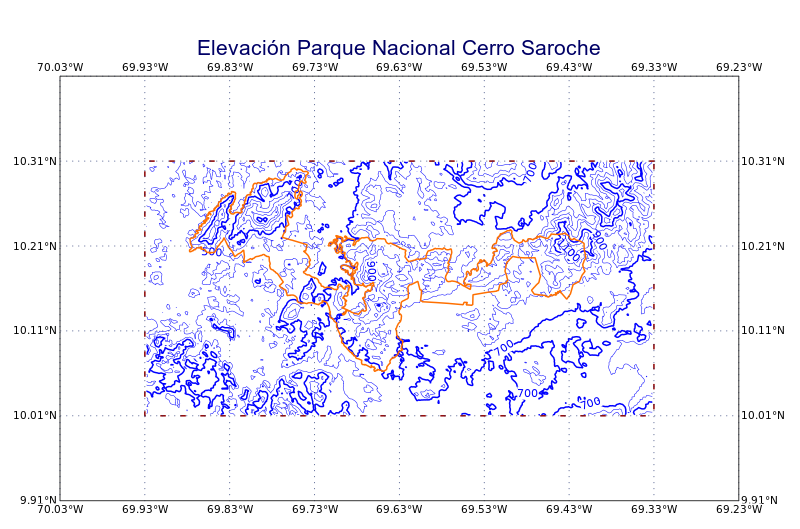

In [7]:
nvis = mv.netcdf_visualiser(netcdf_data=elevacion_rectangulo,
                            netcdf_plot_type='geo_matrix',
                            netcdf_latitude_variable='y',
                            netcdf_longitude_variable='x',
                            netcdf_value_variable='elevacion')

elevacion_shade_grid = mv.mcont(legend='on',
                                contour='on',
                                #contour_level_selection_type='interval',
                                #contour_interval=500,
                                #contour_min_level=500,
                                #contour_max_level=2000,
                                contour_shade='on',
                                contour_shade_technique='grid_shading',
                                contour_shade_cell_resolution=20,
                                contour_shade_colour_method='palette',
                                contour_shade_palette_name='norway_green_7')


coast = mv.mcoast(
                    map_grid_colour              = "RGB(0.1358,0.201,0.4367)",
                    map_grid_latitude_increment=0.1,
                    map_grid_longitude_increment=0.1,
                    map_grid_latitude_reference=10.31,
                    map_grid_longitude_reference=-69.83,
                    map_grid_line_style="dot",
                    map_label_height=0.3,
                  )

crete_map = mv.geoview(map_area_definition='corners',
                       area=park_area,
                       coastlines=coast)

#-------------------------
# poligono
poligono_coords = list(park_bound_sin.exterior.geometry.iloc[0].coords)

latPos = [x[1] for x in poligono_coords]
lonPos = [x[0] for x in poligono_coords]
incr = 1

pltLst = []

# define visualiser
vis = mv.mvl_geopolyline(latPos, lonPos, incr)
graph_area_park = mv.mgraph(
                        graph_type="curve",
                        graph_shade_colour="RGB(255,111,0)",
                        graph_line_colour="RGB(255,111,0)",
                        graph_line_thickness="3",
                        graph_line_style="solid",
                    )

pltLst.extend([vis, graph_area_park])
#-------------------------
# rectangulo
latPos = [10.31,10.01,10.01,10.31,10.31]
lonPos = [-69.93,-69.93,-69.33,-69.33,-69.93]
incr = 1

# define visualiser
vis = mv.mvl_geopolyline(latPos, lonPos, incr)
graph_area = mv.mgraph(
                  graph_type="curve",
                  graph_line_colour="RGB(141,0,0)",
                  graph_line_thickness="3",
                  graph_line_style="chain_dot",
              )


pltLst.extend([vis, graph_area])

# titulo
title = mv.mtext(
    text_lines=['Elevación Parque Nacional Cerro Saroche'],
    text_font_size=0.6,
    text_justification='centre',
    text_orientation='horizontal'
    )

mv.plot(crete_map, nvis, pltLst, title)

#### Regrilla

In [8]:
precipitacion_rds

<xarray.DataArray (band: 626, y: 6, x: 9)>
array([[[8.980518e-04, 8.823256e-04, ..., 1.283392e-03, 1.509335e-03],
        [8.349285e-04, 8.685413e-04, ..., 1.356584e-03, 1.509566e-03],
        ...,
        [1.197629e-03, 1.313122e-03, ..., 1.234983e-03, 1.066873e-03],
        [1.396046e-03, 1.569776e-03, ..., 1.909983e-03, 1.519635e-03]],

       [[8.402613e-05, 1.015620e-04, ..., 5.360890e-04, 6.948270e-04],
        [5.973369e-05, 6.628683e-05, ..., 4.189440e-04, 5.359502e-04],
        ...,
        [1.597060e-04, 1.483062e-04, ..., 2.820735e-04, 2.851276e-04],
        [3.760731e-04, 3.905768e-04, ..., 6.381705e-04, 5.653336e-04]],

       ...,

       [[5.542696e-05, 5.805693e-05, ..., 3.278593e-04, 3.897080e-04],
        [3.870256e-05, 3.939524e-05, ..., 2.555122e-04, 3.072745e-04],
        ...,
        [6.562634e-05, 5.653282e-05, ..., 1.281083e-04, 1.101921e-04],
        [2.444326e-04, 2.006211e-04, ..., 1.149997e-04, 9.224445e-05]],

       [[3.198701e-04, 3.340861e-04, ..., 7.532817e-04, 9.615435e-04],
        [2.540774e-04, 2.635956e-04, ..., 6.392719e-04, 7.868893e-04],
        ...,
        [3.195609e-04, 3.047884e-04, ..., 3.675265e-04, 3.797908e-04],
        [1.043903e-03, 7.949473e-04, ..., 3.816898e-04, 3.762569e-04]]])
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 ... 620 621 622 623 624 625 626
  * x            (x) float64 -70.03 -69.93 -69.83 ... -69.43 -69.33 -69.23
  * y            (y) float64 10.41 10.31 10.21 10.11 10.01 9.91
    spatial_ref  int64 0
Attributes:
    GRIB_COMMENT:           Total precipitation [m]
    GRIB_ELEMENT:           TP
    GRIB_FORECAST_SECONDS:  86400
    GRIB_REF_TIME:          0
    GRIB_SHORT_NAME:        0-SFC
    GRIB_UNIT:              [m]
    GRIB_VALID_TIME:        86400
    scale_factor:           1.0
    add_offset:             0.0
    long_name:              0[-] SFC (Ground or water surface)

In [2]:
path_precipitacion = './cerro_saroche/cdsapi/total_precipitation.grib'
precip = mv.Fieldset(path=path_precipitacion)

precip.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,gridType
Message,,,,,,,,,
0,ecmf,tp,surface,0,19700101,0,24,fc,regular_ll
1,ecmf,tp,surface,0,19700201,0,24,fc,regular_ll
2,ecmf,tp,surface,0,19700301,0,24,fc,regular_ll
3,ecmf,tp,surface,0,19700401,0,24,fc,regular_ll
4,ecmf,tp,surface,0,19700501,0,24,fc,regular_ll
...,...,...,...,...,...,...,...,...,...
621,ecmf,tp,surface,0,20211001,0,0-24,fc,regular_ll
622,ecmf,tp,surface,0,20211101,0,0-24,fc,regular_ll
623,ecmf,tp,surface,0,20211201,0,0-24,fc,regular_ll


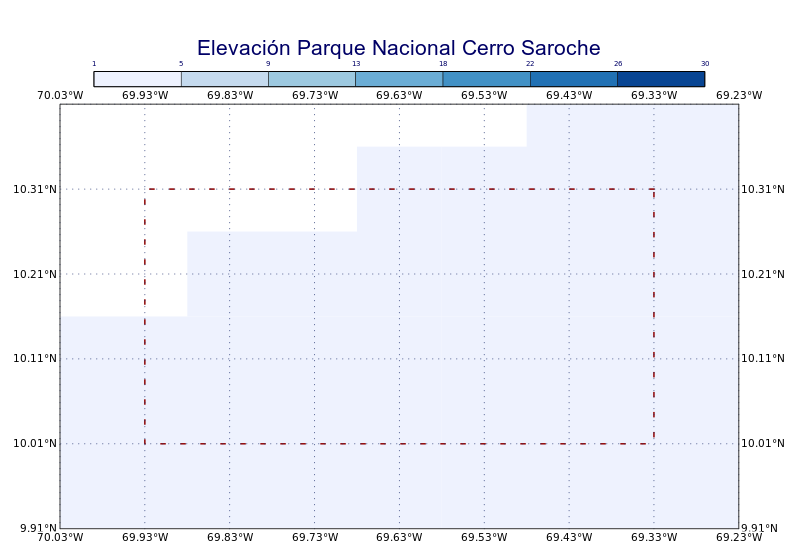

In [9]:
grid_shade = mv.mcont(
    legend                         = "on",
    contour                        = "off",
    contour_level_selection_type   = "level_list",
    contour_level_list             = [1,5,9,13,18,22,26,30],
    contour_shade                  = "on",
    contour_shade_technique        = "grid_shading",
    contour_shade_colour_method    = "palette",
    contour_shade_palette_name     = "colorbrewer_Blues_7_r",
    grib_scaling_of_derived_fields = "on"
    )

coastlines = mv.mcoast(
    map_grid_colour              = "RGB(0.1358,0.201,0.4367)",
    map_grid_latitude_increment=0.1,
    map_grid_longitude_increment=0.1,
    map_grid_latitude_reference=10.31,
    map_grid_longitude_reference=-69.83,
    map_grid_line_style="dot",
    map_label_height=0.3,
    )

view = mv.geoview(
    map_area_definition = "corners",
    area                = park_area,
    coastlines          = coastlines
    )
#-------------------------
# rectangulo
latPos = [10.31,10.01,10.01,10.31,10.31]
lonPos = [-69.93,-69.93,-69.33,-69.33,-69.93]
incr = 1

pltLst = []


# define visualiser
vis = mv.mvl_geopolyline(latPos, lonPos, incr)
graph_area = mv.mgraph(
                  graph_type="curve",
                  graph_line_colour="RGB(141,0,0)",
                  graph_line_thickness="3",
                  graph_line_style="chain_dot",
              )


pltLst.extend([vis, graph_area])

# titulo
title = mv.mtext(
    text_lines=['Elevación Parque Nacional Cerro Saroche'],
    text_font_size=0.6,
    text_justification='centre',
    text_orientation='horizontal'
    )

#mv.plot(view, precip, grid_shade)
mv.plot(view, precip, grid_shade, pltLst, title)